# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>


### Exercise 05.1

The wave functions $\Psi_{nlm}(\vec{x})$ of the eigenstates of the hydrogen atom can be calculated analytically. The eigenstates are specified by three quantum numbers $n$, $l$ and $m$. \
Here, we focus on the ground state $\Psi_{100}(\vec{x})$ and the excited state $\Psi_{210}(\vec{x})$. For these eigenstates, it can be shown that the expectation value of the radius operator $\hat{r} = |\hat{\vec{x}}| = \sqrt{\hat x ^2 + \hat y ^2 + \hat z ^2}$ are given by:
$$\left\langle \hat{r} \right\rangle_{100} = \frac{3}{2}
\quad
\left\langle \hat{r} \right\rangle_{210} = 5.$$

These values are expressed in units of the Bohr radius $a_0=0.0529\,\mathrm{nm}$. We will use this way of expressing lengths throughout the following discussion.

The scope of this exercise is to sample the probability density functions $|\Psi_{100}(\vec{x})|^2$ and $|\Psi_{210}(\vec{x})|^2$ using the **Metropolis algorithm**. To apply the Metropolis algorithm, we have to choose a **trial transition probability** $T(\vec{x}'|\vec{x_n})$, that describes a probability to transit from a given position $\vec{x_n}$ to any other position $\vec{x}'$ in the three dimensional space. We also have to choose a starting point $\vec{x_0}$ that can be used as $\vec{x_n}$ for $n=0$. Once we have calculated the trial transition probability for a certain step $n$, we have to caulcate the so-called **acceptance probability**: 
$$ A(\vec{x}'|\vec{x_n}) = \min \left \{1, \frac{p(\vec{x}')}{p(\vec{x_n})} \right \},$$

where $p$ is the probability density function that we desire to sample, so either $|\Psi_{100}(\vec{x})|^2$ and $|\Psi_{210}(\vec{x})|^2$ in our case. It tells us the probability with which we should accept the step $\vec{x_{n+1}} = \vec{x}'$ proposed by a draw from the trial transition probability or if we should leave $\vec{x_{n+1}} = \vec{x_n}$. \
In the lecture notes, it has been shown that in doing so the set of positions $\{ \vec{x_0}, \vec{x_1}, ..., \vec{x_{M_{max}}} \}$ follows the probability density $p$.

In this exercise, we will use a uniform and a Gaussian trial transition probability to sample positions from $|\Psi_{100}(\vec{x})|^2$ and $|\Psi_{210}(\vec{x})|^2$. We will use them to estimate $\left\langle \hat{r} \right\rangle$ from the simulation.

### Uniform Trial Transition Probability

First of all, we use a uniform trial transition probability, which means that the trial positions $\vec{x}'$ are generated according to

$$
\begin{align}
    \vec{x}' = \vec{x_n} &+ \begin{bmatrix}
           \Delta x \\
           \Delta y \\
           \Delta z
         \end{bmatrix}
\end{align},
$$

where $ \Delta x,  \Delta y,  \Delta z$ are random variables that are independetly drawn from a uniform distribution on $[-\alpha, \alpha)$. 

In order to apply the Metropolis algorithm, we have to chose a starting point. Here, we use the origin $\vec{x_0} = \vec{0}$ of the three-dimensional space. A further discussion on the choice of the starting point can be found below. Then, we compute $10^4$ steps of the Metropolis algorithm without actually conducting a measurement in order to equilibrate the algorithm. We will discuss the number of steps needed for equilibration in further excersices. After that, we are ready to use the Metropolis algorithm to compute $M_{max}=10^6$ samples of both the ground state and the excited state probability density function. In doing so, we use $\alpha = 1.2$ and $\alpha = 3$ to obtain an acceptance rate of $50.80\,\%$ and $49.77\,\%$, respectively (see "50 % emperical rule" in the lecture notes). Below, we visualize every 200th of the obtained positions in a 3D scatter plot. We observe the expected form of an s-orbital and a p-orbital, respectively.   

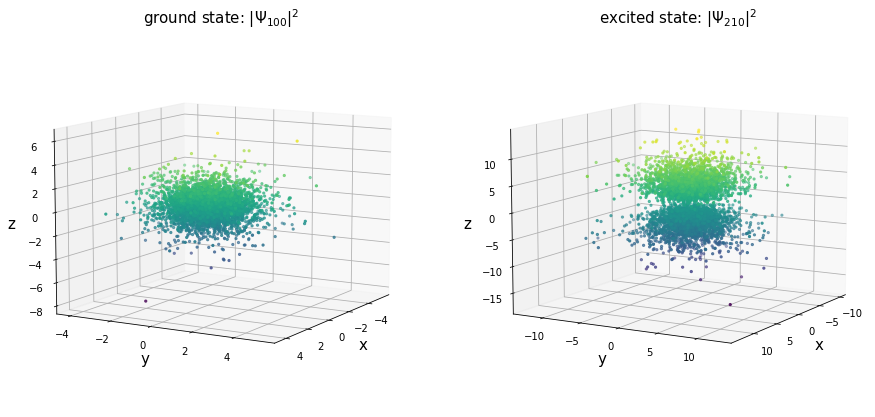

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))

# plot uni_110
x, y, z = np.loadtxt("data/uni_100.xyz", delimiter=',', unpack=True)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c=z, marker='.')
ax1.set_xlabel('x', size=15)
ax1.set_ylabel('y', size=15)
ax1.set_zlabel('z', size=15)
ax1.view_init(10, 30)
ax1.set_title(r"ground state: $|\Psi_{100}|^2$", size=15)

# plot uni_210
x, y, z = np.loadtxt("data/uni_210.xyz", delimiter=',', unpack=True)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x, y, z, c=z, marker='.')
ax2.set_xlabel('x', size=15)
ax2.set_ylabel('y', size=15)
ax2.set_zlabel('z', size=15)
ax2.view_init(10, 30)
ax2.set_title(r"excited state: $|\Psi_{210}|^2$", size=15)

plt.show()

In the figure below, we plot the progressive mean of the obtained positions for both the grond state and the excited state as a function of the number of steps of the Metropolis algorithm, where we use $N_{max}=160$ blocks, each containing $L=6250$ steps, to estimate the uncertainty on the progressive. \
For both cases, we observe that the progressive mean quickly converges to the theoretical expectation value of the radius operator $\langle \hat{r} \rangle$. This makes us confident that the Metropolis algorithm has successfully sampled the probability density functions of the corresponding hydrogen orbitals.

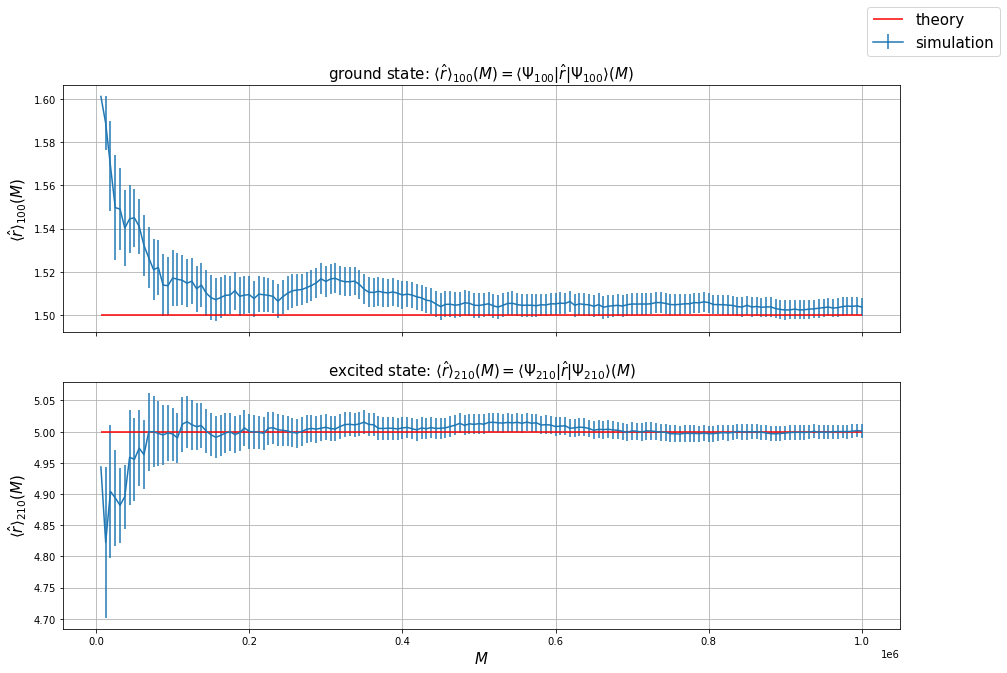

In [120]:
fig, ax = plt.subplots(2, 1, figsize=(15,10), sharex=True)

# plot for uni_100
M, r_mean, r_error  = np.loadtxt("data/uni_100.txt", skiprows=1, unpack=True, delimiter=',')
ax[0].errorbar(M, r_mean, r_error, label="simulation")
ax[0].hlines(1.5, min(M), max(M), color='r', label="theory")
ax[0].set_ylabel(r"$\langle \hat{r} \rangle_{100} (M)$", size=15)
ax[0].set_title(r"ground state: $\langle \hat{r} \rangle_{100} (M) = \langle \Psi_{100} |\hat{r}| \Psi_{100} \rangle(M)$", size=15)
ax[0].grid()

# plot for uni_100
M, r_mean, r_error  = np.loadtxt("data/uni_210.txt", skiprows=1, unpack=True, delimiter=',')
ax[1].errorbar(M, r_mean, r_error)
ax[1].hlines(5, min(M), max(M), color='r')
ax[1].set_ylabel(r"$\langle \hat{r} \rangle_{210} (M)$", size=15)
ax[1].set_title(r"excited state: $\langle \hat{r} \rangle_{210} (M) = \langle \Psi_{210} |\hat{r}| \Psi_{210} \rangle(M)$", size=15)
ax[1].grid()

fig.legend(fontsize=15)
plt.xlabel(r"$M$", size=15)

plt.show()

### Gaussian Trial Transition Probability

Now, we essentially repeat the procedure above except that we use a Gaussian transition probability. Thus, trial positions are generated according to 

$$
\begin{align}
    \vec{x}' = \vec{x_n} &+ \begin{bmatrix}
           \Delta x \\
           \Delta y \\
           \Delta z
         \end{bmatrix}
\end{align},
$$

where $ \Delta x,  \Delta y,  \Delta z$ are random variables that are independetly drawn from a gaussian distribution with mean $\mu=0$ and standard deviation $\sigma$.
For the ground state, we find an acceptance rate of $50.41\,\%$ using $\sigma = 0.75$. For the excited state, $\sigma = 1.9$ leads to an acceptance rate of $49.54\,\%$.

In the figure below, we visualize the sampled positions.

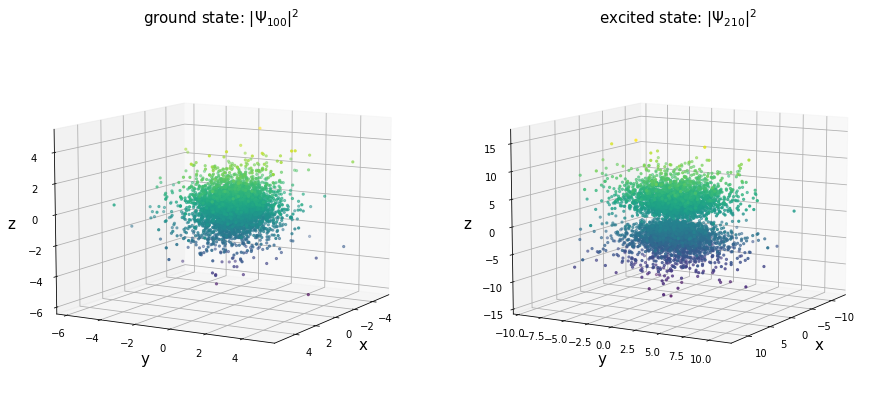

In [121]:
fig = plt.figure(figsize=(15,10))

# plot gaussian_110
x, y, z = np.loadtxt("data/gaussian_100.xyz", delimiter=',', unpack=True)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c=z, marker='.')
ax1.set_xlabel('x', size=15)
ax1.set_ylabel('y', size=15)
ax1.set_zlabel('z', size=15)
ax1.view_init(10, 30)
ax1.set_title(r"ground state: $|\Psi_{100}|^2$", size=15)

# plot gaussian_210
x, y, z = np.loadtxt("data/gaussian_210.xyz", delimiter=',', unpack=True)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x, y, z, c=z, marker='.')
ax2.set_xlabel('x', size=15)
ax2.set_ylabel('y', size=15)
ax2.set_zlabel('z', size=15)
ax2.view_init(10, 30)
ax2.set_title(r"excited state: $|\Psi_{210}|^2$", size=15)

plt.show()

In the figure below, we plot the progressive mean of the simulated radius as a function of the number of steps $M$ of the Metropolis algorithm for the Gaussian trial transition probability. For both cases, the progressive mean converges quickly to the theoretical value. 

We observe that the Metropolis algorithm converges slightly faster for the Gaussian trial transition probability.
This corresponds to the statement in the lecture that the speed of convergence may depend on the choice of the transition probability.

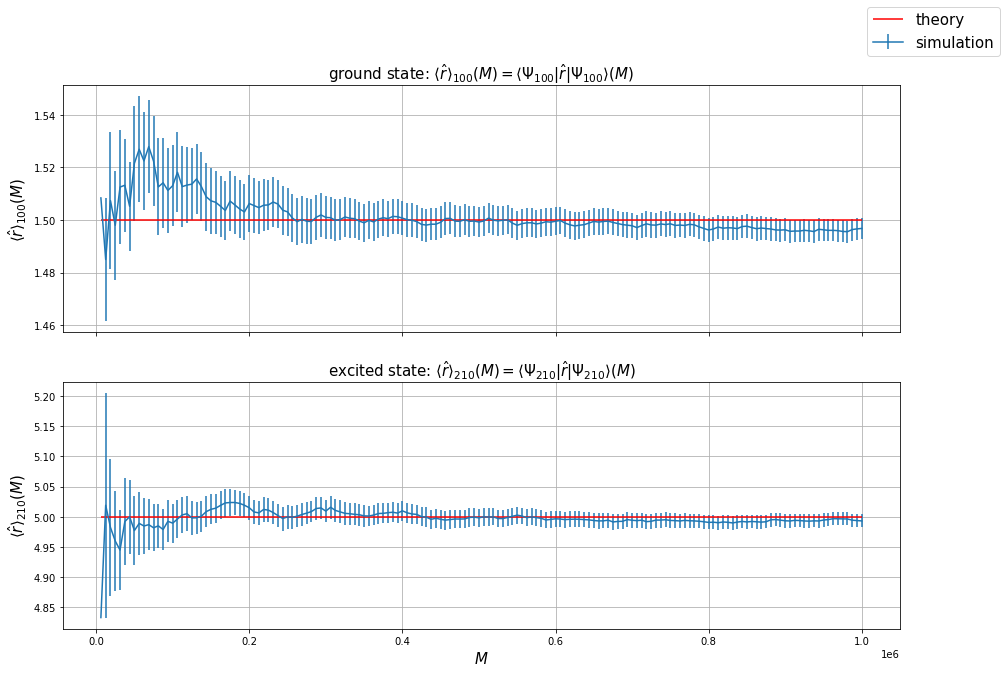

In [122]:
fig, ax = plt.subplots(2, 1, figsize=(15,10), sharex=True)

# plot for gaussian_100
M, r_mean, r_error  = np.loadtxt("data/gaussian_100.txt", skiprows=1, unpack=True, delimiter=',')
ax[0].errorbar(M, r_mean, r_error, label="simulation")
ax[0].hlines(1.5, min(M), max(M), color='r', label="theory")
ax[0].set_ylabel(r"$\langle \hat{r} \rangle_{100} (M)$", size=15)
ax[0].set_title(r"ground state: $\langle \hat{r} \rangle_{100} (M) = \langle \Psi_{100} |\hat{r}| \Psi_{100} \rangle(M)$", size=15)
ax[0].grid()

# plot for gaussian_100
M, r_mean, r_error  = np.loadtxt("data/gaussian_210.txt", skiprows=1, unpack=True, delimiter=',')
ax[1].errorbar(M, r_mean, r_error)
ax[1].hlines(5, min(M), max(M), color='r')
ax[1].set_ylabel(r"$\langle \hat{r} \rangle_{210} (M)$", size=15)
ax[1].set_title(r"excited state: $\langle \hat{r} \rangle_{210} (M) = \langle \Psi_{210} |\hat{r}| \Psi_{210} \rangle(M)$", size=15)
ax[1].grid()

fig.legend(fontsize=15)
plt.xlabel(r"$M$", size=15)

plt.show()

### Choice of Starting Point

Once we have chosen a trial transition probability, the main free parameter of the Metropolis algorithm is the starting point $\vec{x_0}$. We should chose it reasonably such that it lies in a domain, where the probability density function that we seek to sample differs significantly from $0$. Otherwise, the equilibration of the Metropolis algorithm in order to observe conergence will take more steps. \
An illustration of this phenomenon can be found in the figure below. There, we compare the progressive mean of the sampled positions for the ground state using a uniform trial transition probability for two different starting points. In the upper panel, we used the origin $\vec{x_0} = \vec{0}$ as the starting point. In the lower panel, the starting point is $\vec{x_0} = (10, 10, 10)$. Here, we do not use any equilibration steps (like the $10^4$ above) to ensure convergence from the beginning. In doing so, we are able to compare the convergence for different starting positions. As we can see, there is no significant difference between the two cases. So, we conclude that the Metropolis algorithm "moves" quickly to the important region of the probability density function that we want to sample.

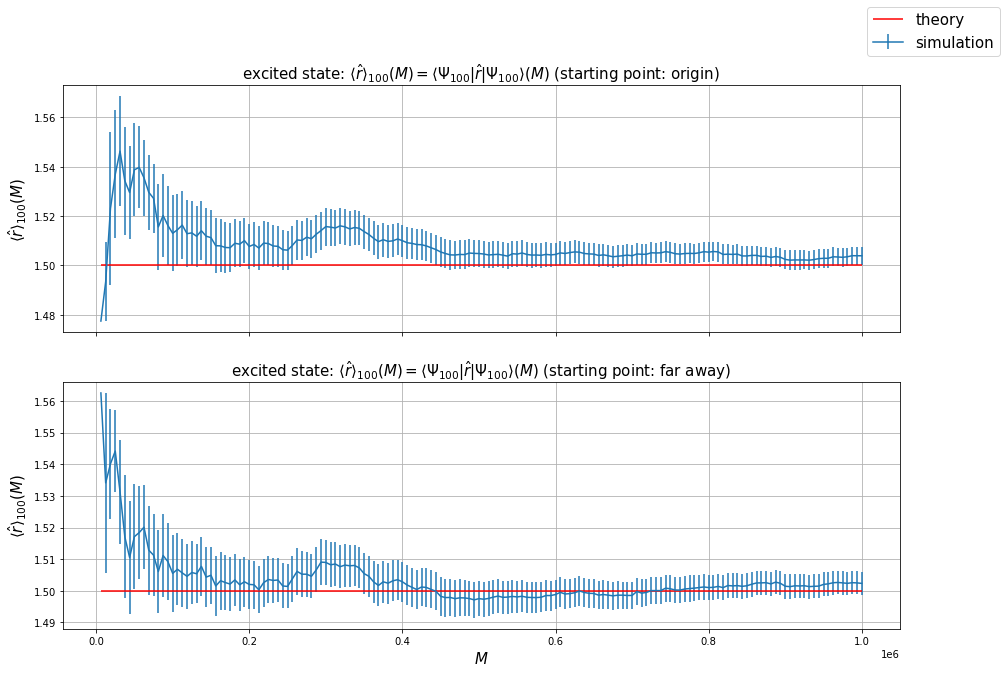

In [124]:
fig, ax = plt.subplots(2, 1, figsize=(15,10), sharex=True)

# plot for uni_100_no_equi
M, r_mean, r_error  = np.loadtxt("data/uni_100_no_equi.txt", skiprows=1, unpack=True, delimiter=',')
ax[0].errorbar(M, r_mean, r_error, label="simulation")
ax[0].hlines(1.5, min(M), max(M), color='r', label="theory")
ax[0].set_ylabel(r"$\langle \hat{r} \rangle_{100} (M)$", size=15)
ax[0].set_title(r"excited state: $\langle \hat{r} \rangle_{100} (M) = \langle \Psi_{100} |\hat{r}| \Psi_{100} \rangle(M)$ (starting point: origin)", size=15)
ax[0].grid()

# plot for uni_100_far_away
M, r_mean, r_error  = np.loadtxt("data/uni_100_far_away.txt", skiprows=1, unpack=True, delimiter=',')
ax[1].errorbar(M, r_mean, r_error)
ax[1].hlines(1.5, min(M), max(M), color='r')
ax[1].set_ylabel(r"$\langle \hat{r} \rangle_{100} (M)$", size=15)
ax[1].set_title(r"excited state: $\langle \hat{r} \rangle_{100} (M) = \langle \Psi_{100} |\hat{r}| \Psi_{100} \rangle(M)$ (starting point: far away)", size=15)
ax[1].grid()

fig.legend(fontsize=15)
plt.xlabel(r"$M$", size=15)

plt.show()